<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/hw2_homeDotTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Home dot tech 

ข้อมูลนี้เป็นข้อมูลเกี่ยวกับ ที่อยู่ในประเทศไทย 

พวกเราจะใช้ file จาก google drive ซึ่งต้องใช้ pyDrive


สามารถ อ่านการใช้งาน pydrive เบื้องต้นได้ตามนี้ 

[example pyDrive](https://colab.research.google.com/drive/1pIl9zCObPc_8BLivb7FRsjYBhKGWK9eL)

[link download file](https://drive.google.com/file/d/1X-cacRIF30acXyKotSmDZu5qc8Gs84Wm/view?usp=sharing)

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode

คุณควร run code ตัวของ example เพื่อทราบถึง file id เพราะว่า file id ของแต่ละคนนั้นไม่เหมือนกันน่ะครับ  [example pyDrive](https://colab.research.google.com/drive/1pIl9zCObPc_8BLivb7FRsjYBhKGWK9eL)


###FILE_ID!!!

<pre>   
title: userLog_201801_201802_for_participants.csv, id: 19sNUEOYeqU33EWBMRKq65YydpgLQoppZ
title: project_main.csv, id: 1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0
title: project_facility.csv, id: 13jUinwDsk9sYvoMOBaTMfTM11912CvdO
</pre>


เนื่องจากข้อมูลใน file เป็น รูปแบบการแยกข้อมูล ใน column แยกด้วย ';' แต่ว่ามันยากที่จัดการ เลยเขียน function เพื่ออ่าน file ดังนี้

In [0]:
def readDataFromDrive_HDT_single_col(file_id):
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  # raw_data = pd.read_csv('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv',delimiter= ';')

  print('#########################################################################################################################')
  return raw_data;
  
def readDataFromDrive_HDT(file_id):
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv')
  print(raw_data.dtypes)
  print('-------------- NA DATA ------------------')
  for name_col in raw_data.columns:
    print(name_col,'null :',raw_data[name_col].isnull().values.any())
  print('#########################################################################################################################')
  return raw_data;

file ที่เราจะเลือกใช้

* userLog
* project_main
* project_facility


userLog  มันการเป็นเก็บ log ของ user ทั้งหมดที่เข้ามาในระบบ ว่า user เข้าผ่านอุปกรณื อะไรบ้างแล้วเข้าไปดูโปรเจคไหน

project_main เป็นการบอกรายละเอียดแต่ละ project ว่ามีข้อมูลอะไรบ้าง เกี่ยวกับตำแหน่ง หรือ ตัวของ ราคา

project_facility บอก facility ของแต่ละโปรคเจคว่าเป็นอย่างไร





# TODO#1: เปลี่ยนข้อมูลเป็นตัวเลข

ข้อมูบบที่เราจะพิจารณาต่อไปนี้เป็นข้อมูล

In [4]:
print('project_main')
project_main = readDataFromDrive_HDT_single_col('1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0')  
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.convert_objects(convert_numeric=True)
project_main.head()

project_main
#########################################################################################################################
(1775, 18)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1.0,2011-01-14T18:40:12.117+0700
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0.0,2011-02-24T21:43:59.297+0700
7,208,13323,NaN,ลิฟวิ่งนารา รามคำแหง-สุวรรณภูมิ,LIVING NARA RAMKHAMHAENG-SUVARNABHUMI,1011.0,10,13.769810,100.722040,44,201.0,NaN,3500000.0,7600000.0,0.0,2010-07-02T07:00:00.000+0700
8,228,6772,0.0,เค.ซี.รามอินทรา 5 (พระยาสุเรนทร์),K.C. RAMINTRA 5,1046.0,10,13.862623,100.695135,34,NaN,NaN,1810000.0,NaN,0.0,2010-12-16T18:51:42.173+0700
11,982,12136,979.0,อนาวิลล์ สุวรรณภูมิ,Anaville Suvarnabhumi,1011.0,10,13.763348,100.803434,131,NaN,NaN,4300000.0,NaN,1.0,2011-01-17T22:55:47.317+0700


# TODO#2: แก้ไขข้อมูล data frame ของ projet_main ให้ไม่มี NAN

In [0]:

project_main = project_main.dropna(subset=['lat'])

project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])


## TODO#3: load ข้อมูล facility
ลอง print ข้อมูลดูเราจะเห็นว่าข้อมูล และอธิบายว่าเหมาะสมกับการใช้หรือไม่


In [6]:
# project_facility  
project_facility = readDataFromDrive_HDT_single_col('13jUinwDsk9sYvoMOBaTMfTM11912CvdO')
project_facility.head()

#########################################################################################################################


,project_id,facility_id
0,4,1
1,4,3
2,4,4
3,4,5
4,45,2



## TODO#4: แปลงข้อมูล fac ให้เหมาะแก้การใช้งาน 
เนื่องจากข้อมูลไม่ได้เป็นรูปแบบของตารางที่ใช้ได้ง่าย [pd.crosstab](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html) เพราะ เราต้องการตารางที่บอกถึง facility ว่ามีหรือไม่ในทุกแบบของ facility

In [7]:
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table.index)
project_facility_table.head()

Int64Index([   4,   24,   29,   41,   44,   45,   73,   95,  115,  133,
            ...
            9522, 9524, 9525, 9526, 9527, 9531, 9532, 9534, 9536, 9541],
           dtype='int64', name='project_id', length=5039)


facility_id,1,2,3,4,5,6
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


## TODO#5: กำจัดข้อมูลที่ใช้ไม่ได้ ออกไป เลือกใช้แต่ข้อมูลที่ครบ

เราจำเป็นต้องแยกข้อมูลให้เหลือ project ที่มีข้อมูลครบ เท่านั้น  เราสามารถใช้ [pandas.DataFrame.isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) เพื่อช่วยในการหา วา่มีข้อมูลร่วมกันได้ในการแยกข้แมูลออกมา

In [8]:


project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()

(1697, 6)
(1697, 16)


facility_id,1,2,3,4,5,6
project_id,,,,,,
24,0,0,1,1,0,1
44,1,0,1,0,0,0
45,0,1,1,1,1,0
95,1,0,0,0,0,0
133,1,0,1,0,1,0


In [9]:
project_main.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0.0,2011-02-24T21:43:59.297+0700
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1.0,2011-01-14T18:40:12.117+0700
164,45,2840,0.0,พาร์คเวย์ ชาเล่ต์,parkway chalet,1010.0,10,13.803465,100.727406,87,NaN,NaN,5500000.0,NaN,0.0,2011-03-28T23:27:08.833+0700
172,95,2730,NaN,อารีน่า พาร์ค ชวนชื่น ซิตี้,NaN,1005.0,10,13.859276,100.665287,79,NaN,NaN,2000000.0,5000000.0,0.0,2007-04-18T23:02:22.000+0700
185,133,6772,538.0,เค.ซี.เลควิว,K.C. LAKEVIEW,1044.0,10,13.759440,100.679230,60,NaN,NaN,11000000.0,NaN,1.0,2011-01-14T18:42:51.630+0700


## TODO#6: ลองดูข้อมูล จาก user log 



ลอง check ข้อมูลของ log data 

In [10]:
# care values province_id
# we use only bangkok  province_id = 10 
### load data ###############################################################################
print('userLog')
userLog = readDataFromDrive_HDT_single_col('19sNUEOYeqU33EWBMRKq65YydpgLQoppZ') 
userLog.head()


userLog
#########################################################################################################################


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
0,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
1,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
2,cb5b4b68-cc01-6db6-f54b-4a0f881301c5,5067,Mobile,iPhone,HomeWebsite,2018,1,1,0
3,5f74cef2-0d1e-b619-3564-0955a14e0985,6654,Mobile,iPhone,Google,2018,1,1,0
4,dba8f279-844e-eef6-73ac-22bd7d1353cc,6474,Mobile,iPad,Google,2018,1,1,0


In [11]:
print(userLog.shape)


(1234579, 9)


In [12]:
print(userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))].shape)
userLog = userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))]

(405448, 9)


## TODO#7: ข้อมูล histrogram ของตัว user และ project ที่ user ดู

จง check ดูความบ่อยของการใช้ user และ plot histogram ออกมา

In [13]:
userLog_freq_user = userLog['userCode'].value_counts()
userLog_freq_user_np  = np.array(userLog_freq_user.values)
userLog_freq_proj = userLog['project_id'].value_counts()
userLog_freq_proj_np = np.array(userLog_freq_proj.values)
print(userLog_freq_user_np.shape)

(175127,)


จงแสดง histogram ของความถี่ของ user และ ใช้ pd.head() เพื่อดูค่าช่วงต้นๆ ของ histogram

In [14]:
print(userLog_freq_proj.shape)

(1685,)


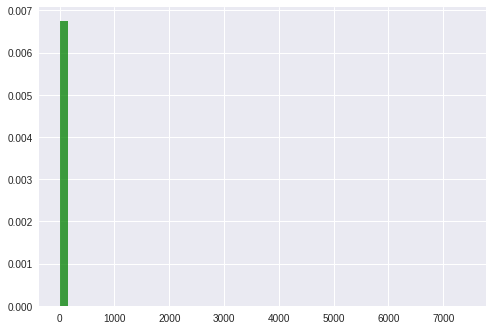

In [15]:
n, bins, patches = plt.hist(userLog_freq_user_np, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

## TODO#8: จงหาค่า medium และ mode ของ ความถี่ในการเข้าใช้ ของ user
จากค่าที่พิจารณา  จงหา mode 

In [16]:
print(mode(userLog_freq_user_np))
print(np.percentile(userLog_freq_user_np, 95))
#print('++++++++++++++++++++++++++++++++++++++++++')

ModeResult(mode=array([1]), count=array([110653]))
7.0


## TODO#9: 

จากกราฟ histogram ที่ได้ละ ค่า mode medium และ ค่าสูงสุดที่ user ใช้ จงบอกปัญหาของข้อมูล ของ userlog ว่าเกิดอะไรขึ้น

เขียนคำตอบ :

## TODO#10: 

จะสังเกตว่าค่า ของ histogram user นั้นมี user ประหลาดอยู่ดังนั้น เราจะกำลังข้อมูลที่ไม่ดีออกไป โดยการตัด เปอร์เซ็นไทน์ 90 ของการใช้ของ user

สามารถใช้  [numpy.percentile](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.percentile.html) ช่วยได้

ดึงค่า pd.index ออกมา



In [17]:
print(np.percentile(userLog_freq_user_np, 95))
normal_user = userLog_freq_user.loc[userLog_freq_user <= np.percentile(userLog_freq_user_np, 95) ].index
print(normal_user.shape)
userLog = userLog.loc[userLog['userCode'].isin(normal_user)]
userLog.shape

7.0
(168149,)


(283526, 9)

clear to top project

In [18]:
# we use only 1000 project to compute fast
top_percentile = 100 - (1000*100/userLog_freq_proj.shape[0])
print(top_percentile)
print(np.percentile(userLog_freq_proj_np, top_percentile))
proj_top = userLog_freq_proj.loc[ userLog_freq_proj >= np.percentile(userLog_freq_proj_np, top_percentile) ].index
print(proj_top.shape)

# print(proj_top)
userLog = userLog.loc[userLog['project_id'].isin(proj_top)]
print(userLog.shape)
userLog.head()


40.652818991097924
86.593471810089
(1000,)
(267675, 9)


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
8,9794fe34-fb0f-4242-8a35-7610cb1e0ee8,9323,Mobile,iPad,Facebook,2018,1,1,0
10,9794fe34-fb0f-4242-8a35-7610cb1e0ee8,9323,Mobile,iPad,HomeWebsite,2018,1,1,0
12,5badf2de-4bc2-c66b-64fd-13184832dfa0,2560,Desktop,Windows,Google,2018,1,1,0
14,67134749-f09c-747e-777c-59d7cba5e179,4201,Mobile,iPhone,Other_PageReferer,2018,1,1,0
15,a9edf492-d59f-874b-88ab-a729bacef361,3860,Mobile,iPhone,Google,2018,1,1,0


In [19]:
## clear data 

project_facility_table = project_facility_table.loc[project_facility_table.index.isin(proj_top)]
project_main = project_main.loc[project_main['project_id'].isin(proj_top)]

print(project_facility_table.shape)
print(project_main.shape)

(1000, 6)
(1000, 16)


เนื่องจาก ข้อมูล มีจำนวนมาก เราจะเลือกแค่ project ที่คนเข้ามาดูมากที่สุด top 1000 project มาคิดเท่านั้น

#optional 

พวกเราสามารถ filter ข้อมูลด้วยตำนวนครั้งที่เปิดขึ้นมาดูได้หรือไม่

------

## TODO#11:

เราจะสร้าง recommendation system ที่มี

In [20]:
#userLog.head()
userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])
userLog_last_week  = userLog.loc[userLog['month'] == 2]
userLog_last_week = userLog_last_week.loc[ userLog_last_week['day'] >=16]
print(userLog_last_week.shape)

userLog_last_week.head()


(38043, 9)


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
1054441,6c5318e0-9acb-68e9-ffe5-2be46d42bdf6,5500,Mobile,Android,HomeWebsite,2018,2,16,0
1054445,69dffbf7-06c6-20e8-4332-204ceb19101f,5323,Mobile,iPhone,Facebook,2018,2,16,0
1054448,028f5656-3e7d-7fc0-f2c8-03e14edaaff1,8056,Mobile,iPhone,Google,2018,2,16,0
1054455,3cef1b5d-7cec-7ed8-ba4b-47e3b1539232,6571,Mobile,iPhone,HomeWebsite,2018,2,16,0
1054459,5756d901-f97f-fd2c-da78-1175550887ce,5176,Mobile,Android,Google,2018,2,16,0


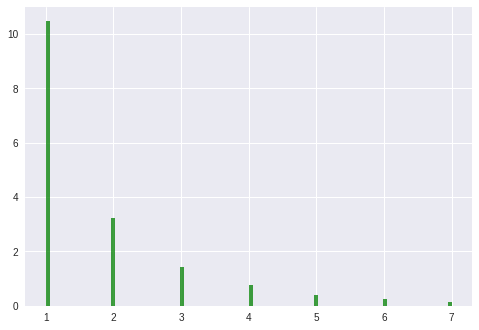

(22185,)


In [21]:
user_freq_last_week = userLog_last_week['userCode'].value_counts()
user_freq_last_week_np = np.array(user_freq_last_week.values)

n, bins, patches = plt.hist(user_freq_last_week_np, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

print(user_freq_last_week.shape)

In [22]:
print(user_freq_last_week.index.shape)


(22185,)


# clear data user log

In [23]:
userLog = userLog.loc[userLog['userCode'].isin(user_freq_last_week.index)]
print(userLog.shape)
print(userLog['userCode'].value_counts().shape)
#freq_user_seen_proj = pd.crosstab(userLog['project_id'], userLog['userCode'], rownames=['project_id'], colnames=['userCode'])
#freq_user_seen_proj_np = np.array(freq_user_seen_proj.values)

#print(freq_user_seen_proj_np.shape)
#print(freq_user_seen_proj.shape)
#print(np.sum(freq_user_seen_proj_np >= 2 ))
#freq_user_seen_proj.head()

(42988, 9)
(22185,)


------

# split train and test set

พวก เราจะใช้ user ที่มาใช้ในสัปดาห์สุดท้ายเป็น test set

ที่เหลือ เป็น train set

In [31]:
userLog_test = userLog.loc[userLog.index.isin(userLog_last_week.index)]
userLog_train = userLog.loc[~userLog.index.isin(userLog_last_week.index)]
print(userLog_last_week.index)
print(userLog_train.shape)
print(userLog_test.shape)

Int64Index([1054441, 1054445, 1054448, 1054455, 1054459, 1054461, 1054464,
            1054480, 1054490, 1054494,
            ...
            1234496, 1234506, 1234511, 1234512, 1234554, 1234555, 1234556,
            1234559, 1234562, 1234577],
           dtype='int64', length=38043)
(4945, 9)
(38043, 9)


----


# TODO#11:  function to normalize data


In [0]:
def normalize(x):
  x_min = np.min(x,axis = 0)
  x_max = np.max(x,axis = 0)
  x_nor = (x - x_min)/ (x_max - x_min)
  return x_nor,x_min,x_max;

# recommendation system
พวกเราจะสร้าง recomentation sys โดยเราจะใช้ NNในการสร้างขึ้นมา

[Nearest Neighbors example](https://scikit-learn.org/stable/modules/neighbors.html)


[distance function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)

In [0]:
# recommentdation system
def feature_sel(userCode,np_proj_fea_min,np_proj_fea_max):
  user_Log_data = userLog.loc[userLog['userCode'].isin(userCode)]

  user_seen_proj = user_Log_data['project_id'].values

  user_proj_far = project_facility_table.loc[project_facility_table.index.isin(user_seen_proj)]

  user_proj_main = project_main.loc[project_main['project_id'].isin(user_seen_proj)]

  np_data = np.hstack(( np.array(user_proj_main[["lat","lon","starting_price"]].values) ,  np.array(user_proj_far.values) ))
  np_data_nor = (np_data - np_proj_fea_min)/(np_proj_fea_max-np_proj_fea_min)
  np_data_nor = np.mean(np_data_nor,axis = 0)
  print(np_data_nor.shape)
  return np_data_nor,user_seen_proj;


# TODO#11: 

run example จาก feature ที่เรากำหนด ขึ้นจากหัวข้อด้านบน



In [27]:
nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_nor) # metric=’minkowski’ , “jaccard”  ## jaccard use boolean
# print(project_main_np_data_nor)
sample_usercode = np.random.randint(userLog.shape[0],size = 1)
print(sample_usercode)
user_sample_code = userLog['userCode'].iloc[sample_usercode].values
print(user_sample_code)
user_sample_feature,user_sample_seen_proj = feature_sel(user_sample_code,project_main_np_data_min,project_main_np_data_max) # project_main_np_data_min,project_main_np_data_max
print(user_sample_feature)
distances, indices = nbrs_proj.kneighbors([user_sample_feature])

print(indices)

print(distances)
print('----------------------------------------------------')


NameError: ignored

ลองสรา้ง  recommendation system จาก การดูของ user ว่า ใกล้เคียง กับ user คนไหนบ้าง และ recommend ตาม porj ที่ไม่ได้ดู

แต่การสร้าง user ขึ้นมา ข้อมูลที่มีนั้นใหญ่เกินไปที่เราจะประมวลผลได้ ดังนั้น เราต้องเลือก user มา top 1000 มาเป็น exaple ที่เลือก recommend

In [28]:
freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
#print(freq_user_seen_proj_train_np)
print(freq_user_seen_proj_train_np.shape)

freq_user_seen_proj_train.head()

(2451, 796)


project_id,44,133,189,228,234,235,253,287,291,314,...,9369,9370,9371,9381,9383,9385,9386,9388,9389,9403
userCode,,,,,,,,,,,,,,,,,,,,,
0035bcd3-d7c5-1362-3c47-638c3567a370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00d84457-06b6-d1b6-2292-a661e83def6e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00da36ab-e111-504d-2f62-37e2b26bb96b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010ace21-ccf0-3f1d-12a8-6e8606d8f072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
017e9340-8c74-8859-9d64-fb107f9df3a6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
#print(freq_user_seen_proj_test_np)
print(freq_user_seen_proj_test_np.shape)

freq_user_seen_proj_test.head()

(22185, 996)


project_id,44,228,234,235,253,287,291,314,618,836,...,9383,9385,9386,9388,9389,9403,9422,9446,9471,9483
userCode,,,,,,,,,,,,,,,,,,,,,
0009ecb5-23d3-d9d5-16fd-6d9b39465d87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000b00a0-8fc3-1677-c405-a8389b484979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00173c21-1f39-3a33-8ceb-2cb27f83c7b7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00178175-cc2f-c739-4015-e4efc580c351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001b3ba6-b457-badf-8862-4993adfd6636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ลองสุ่มตัวอย่างเพื่อทดสอบผลลัพธ์

In [0]:
# normalize(x):

nbrs_user = NearestNeighbors(n_neighbors= 6 , algorithm='auto',metric='jaccard' ).fit(freq_user_seen_proj_train_np >= 1)
print(freq_user_seen_proj_train_np.shape)

In [0]:
distances, indices = nbrs_user.kneighbors(freq_user_seen_proj_train_np >= 1)
print('index')
print(indices[0:20])
print(indices.shape)
#print(distances[0:20])
#print('----------------------------------------------------')

แสดงผลการ recommendation โดยดูจากผลลัพธ์ว่าใกล้เคียงอย่างไรบ้าง

In [0]:
freq_user_seen_proj_all = pd.crosstab(userLog['userCode'], userLog['project_id'], rownames=['userCode'], colnames=['project_id'])
print(freq_user_seen_proj_all.shape)
num_rand =np.random.randint(22185,  size=1)
#print(num_rand)
user_0_seen = freq_user_seen_proj_all.iloc[10000].values

# print(user_0_seen > 0)
print('difgkdpfgodfkgdfjgoidjfgoidfgjo')
print(freq_user_seen_proj_all.columns[user_0_seen > 0].values)

# print(freq_user_seen_proj_all[1905].head(1))

print('------------------------------------------------------')
print(freq_user_seen_proj_all.loc['0009ecb5-23d3-d9d5-16fd-6d9b39465d87'])

In [0]:
def proj_seen(data_freq_seen):
  all_colums = data_freq_seen.columns
  all_index = data_freq_seen.index
  output_list ={}
  for index in np.arange(len(all_index)):
    np_array = np.array(data_freq_seen.iloc[index])
    output_list[all_index[index]] = all_colums[np_array > 0].values
  return output_list

In [0]:
output = proj_seen(freq_user_seen_proj_all)

In [0]:
print(indices.shape)
print(freq_user_seen_proj_all.shape)
indices[5,5]

In [0]:
a = [1,2]
b = [3,4,5]
print(a)
print(b)
print(a+b)

In [0]:
def proj_recommend(data_freq_seen,nn_index):
  all_colums = data_freq_seen.columns
  all_index = data_freq_seen.index
  output_list = {}
  print(len(all_index))
  for index in np.arange(len(all_index)):
    list_in_index =[]
    for j_index in np.arange(nn_index.shape[1]):
      index_df = nn_index[index,j_index]
      np_array = np.array(data_freq_seen.iloc[index_df])
      list_in_index = list_in_index + list(all_colums[np_array > 0].values)
    output_list[all_index[index]] = list_in_index
  return output_list

In [0]:
output_rec = proj_recommend(freq_user_seen_proj_all,indices)

ในการ recommendation จริงๆนั้นมีการ วัดผลการ recommend โดยใช้รูปแบบนี้เป็นหลักลองแสดงการวัดผลโดยใช้ matrix นี่ดู [Mean Average Precision](http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html?fbclid=IwAR2UOfz0a_2Ig60aQ2HszgZq63nch96Hbzod2q54kDZRZT_mPzdsxJXyPj0)

In [0]:
def mean_average_precision(y_test,y_pred,k):
  if(k < y_pred.shape[1]):
    print('error k')
    return
  if(  y_test.shape[1] != y_pred.shape[1]):
    print('error number of data')
    return
  
  preci_k = np.zeros((y_pred.shape[0],k))
  for i in np.arange(y_pred.shape[0]):
    for j in np.arange(k):
      num_precision = j + 1
      count_at_k = np.sum(y_pred[i,0:num_precision].isin(y_test[i,:]))
      preci_k[i,j] = count_at_k/num_precision
  
  return np.mean(preci_k, axis=1)
      

------
------
-----------
-----------

# K-mean



การ ที่เราทำ k-mean นั้น จะขึ้นกับระยะห่างที่เราตั้งขึ้นมา ดังนั้น feature ที่มาค่า conv ที่สูงนั้นจะส่งผลต่อการคำนวนมากเพราะ ค่าของ feature มากกว่า feature อื่นๆมากเกินไป ดังนั้น ก่อนที่เราจะ ใช้ k mean เราจพเป็นต้อง normalize  feature ของเราทั้งหมดก่อน

ทดลองทำ k-mean โดยใช้ข้อมูล ของ ทำแหน่งที่ตั้ง ราคา และ facility ต่างเป็น feature

In [0]:
project_main_np_data  = np.hstack((np.array(project_main[["lat","lon","starting_price"]].values) , np.array(project_facility_table.values)))    
project_main_np_data_nor,project_main_np_data_min,project_main_np_data_max  = normalize(project_main_np_data)
print(np.count_nonzero(np.isnan(project_main_np_data_nor)))


แสดงผลลัพธ์การ รัน k mean ออกมา

[K-mean example](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [0]:
plt.plot(project_main_np_data[:,0], project_main_np_data[:,1], 'r^')
plt.show()
##
from sklearn.cluster import KMeans
kmean_result =  KMeans(n_clusters=8).fit(project_main_np_data_nor)
kmean_result.fit(project_main_np_data)
# print(kmean_result.labels_)
### k-mean 
colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko', 'wo']
for i in np.arange(project_main_np_data.shape[0]):
  plt.plot(project_main_np_data[i,0], project_main_np_data[i,1], colors[kmean_result.labels_[i]])
plt.show()

##


แสดงความคิดเห็นกับข้อมูลที่ visual ออกมา


In [0]:
freq_user_seen_proj = pd.crosstab(userLog['project_id'], userLog['userCode'], rownames=['project_id'], colnames=['userCode'])
freq_user_seen_proj_np = np.array(freq_user_seen_proj.values)

#print(freq_user_seen_proj_np.shape)
print(freq_user_seen_proj.shape)
freq_user_seen_proj.head()


In [0]:
kmean_result =  KMeans(n_clusters=8).fit(freq_user_seen_proj_np)
# kmean_result.fit(project_main_np_data)
# print(kmean_result.labels_)
### k-mean 
colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko', 'wo']
for i in np.arange(project_main_np_data.shape[0]):
  plt.plot(project_main_np_data[i,0], project_main_np_data[i,1], colors[kmean_result.labels_[i]])
plt.show()